In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import yule_walker

In [2]:
df_time_series = pd.read_csv('datasets/historical_demand_sum.csv', index_col='time_index')
df_time_series.head()

,demand_MWh
time_index,
2012-01,1.080470e+07
2012-02,1.008555e+07
2012-03,1.017537e+07
2012-04,8.969068e+06
2012-05,9.597272e+06


<AxesSubplot: xlabel='time_index'>

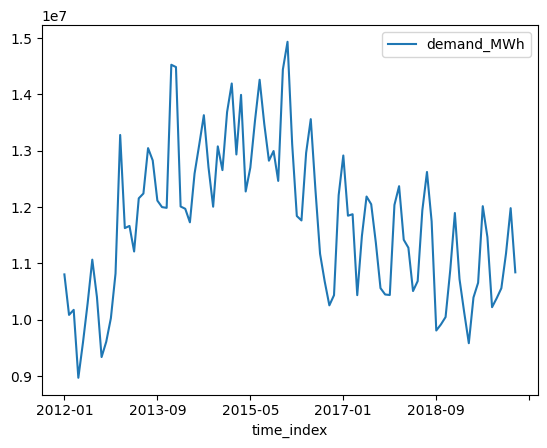

In [3]:
df_time_series.plot()

In [4]:
df_time_series['demand_MWh_shifted'] = df_time_series['demand_MWh'].shift(1)
df_time_series.dropna(inplace=True)

In [5]:
df_time_series.corr()

,demand_MWh,demand_MWh_shifted
demand_MWh,1.000000,0.743123
demand_MWh_shifted,0.743123,1.000000


## Stationarity and ADF Test

In [6]:
result = adfuller(df_time_series[['demand_MWh']])
print(result)
pvalue = result[1]
if pvalue < 0.05:
 print('stationary')
else:
 print('not stationary')

(-1.3228525220472214, 0.6186534962256727, 12, 84, {'1%': -3.510711795769895, '5%': -2.8966159448223734, '10%': -2.5854823866213152}, 2495.561290403197)
not stationary


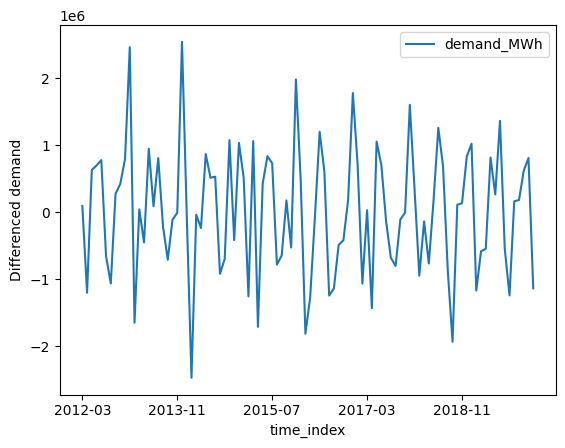

In [7]:
# Difference the data
differenced_data = df_time_series[['demand_MWh']].diff().dropna()
# Plot the differenced data
ax = differenced_data.plot()
ax.set_ylabel('Differenced demand')
plt.show()

In [13]:
differenced_data.shift(1)

,demand_MWh
time_index,
2012-03,NaN
2012-04,89812.774
2012-05,-1206296.596
2012-06,628203.607
2012-07,694910.383
...,...
2019-10,-1245430.320
2019-11,160022.365
2019-12,176879.505


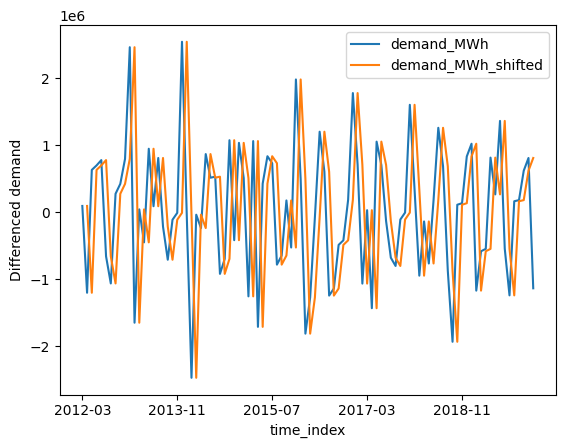

,demand_MWh,demand_MWh_shifted
demand_MWh,1.000000,0.006203
demand_MWh_shifted,0.006203,1.000000


In [14]:
differenced_data['demand_MWh_shifted'] = differenced_data['demand_MWh'].shift(1)
ax = differenced_data.plot()
ax.set_ylabel('Differenced demand')
plt.show()
differenced_data.corr()

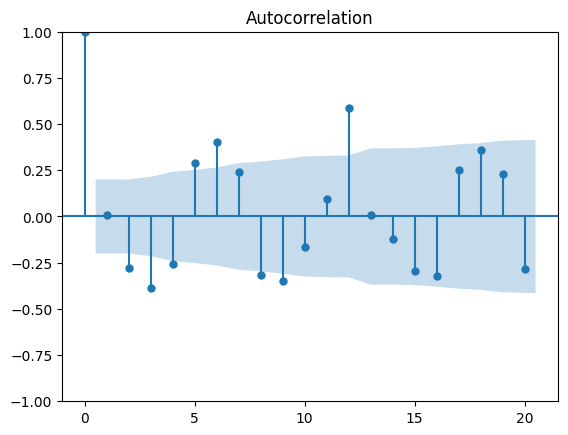

In [17]:
plot_acf(differenced_data['demand_MWh'], lags=20)
plt.show()

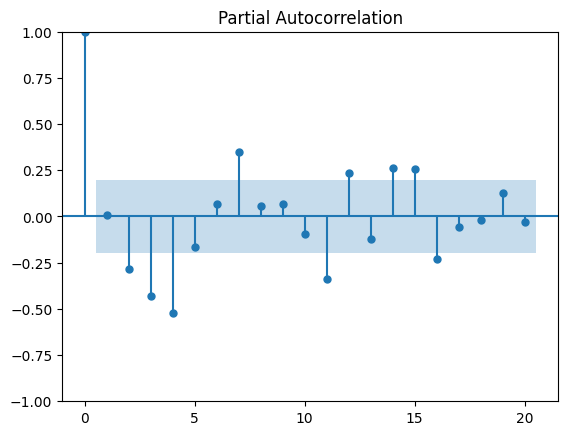

In [20]:
plot_pacf(differenced_data['demand_MWh'], lags = 20)
plt.show()

In [24]:
coefficients, sigma = yule_walker(differenced_data['demand_MWh'], order = 3)
print('coefficients: ', -coefficients)
print('sigma: ', sigma)

coefficients:  [0.11420965 0.27959427 0.4316665 ]
sigma:  828399.6692823435


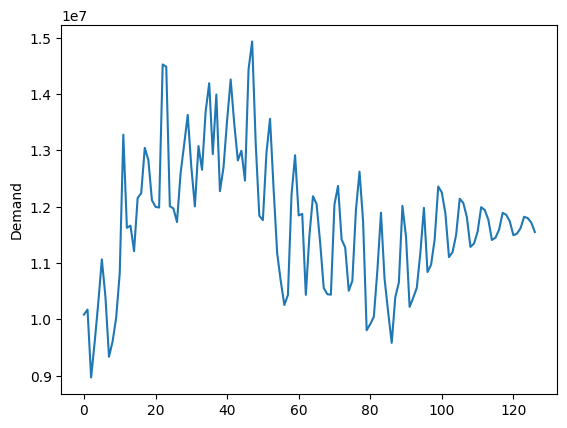

In [29]:
coefficients, sigma = yule_walker(differenced_data['demand_MWh'], order = 3)
# Make a list of differenced values
val_list = list(differenced_data['demand_MWh'])
# Reverse the list so that the order corresponds with the order of the 
coefficients
val_list.reverse()
# Define the number of years to predict
n_steps = 10
# For each year to predict
for i in range(n_steps):
    # Compute the new value as the sum of lagged values multiplied by their corresponding coefficient
    new_val = 0
    for j in range(len(coefficients)):
        new_val += coefficients[j] * val_list[j]
        # Insert the new value at the beginning of the list
        val_list.insert(0, new_val)
# Redo the reverse to have the order of time
val_list.reverse()
# Add the original first value back into the list and do a cumulative sum to undo the differencing
val_list = [df_time_series['demand_MWh'].values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()
# Plot the newly obtained list
new_val_list
plt.plot(new_val_list)
plt.ylabel('Demand')
plt.show()